## Arbitrary number of channels parametrization

This notebook uses the new param.image parametrization that takes any number of channels.

In [ ]:
!pip install --quiet "lucid>=0.3.11"
#!pip install --quiet --upgrade-strategy=only-if-needed git+https://github.com/tensorflow/lucid.git

In [4]:
import numpy as np
import tensorflow as tf

import lucid.modelzoo.vision_models as models
from lucid.misc.io import show
import lucid.optvis.objectives as objectives
import lucid.optvis.param as param
import lucid.optvis.render as render
import lucid.optvis.transform as transform

In [5]:
model = models.InceptionV1()
model.load_graphdef()

### Testing params 

The following params are introduced to test the new param.imag parametrization by going back to three channels for the existing modelzoo models

In [6]:
def arbitrary_channels_to_rgb(*args, channels=None, **kwargs):
    channels = channels or 10
    full_im = param.image(*args, channels=channels, **kwargs)
    r = tf.reduce_mean(full_im[...,:channels//3]**2, axis=-1)
    g = tf.reduce_mean(full_im[...,channels//3:2*channels//3]**2, axis=-1)
    b = tf.reduce_mean(full_im[...,2*channels//3:]**2, axis=-1)
    return tf.stack([r,g,b], axis=-1)

def grayscale_image_to_rgb(*args, **kwargs):
    """Takes same arguments as image"""
    output = param.image(*args, channels=1, **kwargs)
    return tf.tile(output, (1,1,1,3))

### Arbitrary channels parametrization

`param.arbitrary_channels` calls param.image and then reduces the arbitrary number of channels to 3 for visualizing with modelzoo models.

render vis graph: <tensorflow.python.framework.ops.Graph object at 0x1478244c0>
512 1092.7628



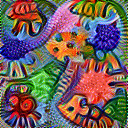

In [7]:
_ = render.render_vis(model, "mixed4a_pre_relu:476", param_f=lambda:arbitrary_channels_to_rgb(128, channels=10))

### Grayscale parametrization

`param.grayscale_image` creates param.image with a single channel and then tiles them 3 times for visualizing with modelzoo models.

render vis graph: <tensorflow.python.framework.ops.Graph object at 0x144f36c10>
512 1074.4703



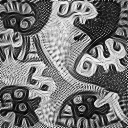

In [8]:
_ = render.render_vis(model, "mixed4a_pre_relu:476", param_f=lambda:grayscale_image_to_rgb(128))

### Testing different objectives

Different objectives applied to both parametrizations.

render vis graph: <tensorflow.python.framework.ops.Graph object at 0x1484032b0>
512 140028.28



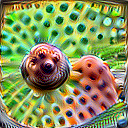

render vis graph: <tensorflow.python.framework.ops.Graph object at 0x1484e2fd0>
512 1161.78



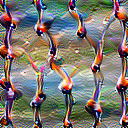

render vis graph: <tensorflow.python.framework.ops.Graph object at 0x148705340>
512 1969.0486



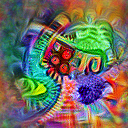

In [9]:
_ = render.render_vis(model, objectives.deepdream("mixed4a_pre_relu"), param_f=lambda:arbitrary_channels_to_rgb(128, channels=10))
_ = render.render_vis(model, objectives.channel("mixed4a_pre_relu", 360), param_f=lambda:arbitrary_channels_to_rgb(128, channels=10))
_ = render.render_vis(model, objectives.neuron("mixed4a_pre_relu", 476), param_f=lambda:arbitrary_channels_to_rgb(128, channels=10))

render vis graph: <tensorflow.python.framework.ops.Graph object at 0x148c90d60>
512 110382.39



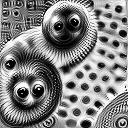

render vis graph: <tensorflow.python.framework.ops.Graph object at 0x144d6bdf0>
512 864.99036



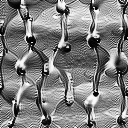

render vis graph: <tensorflow.python.framework.ops.Graph object at 0x148247640>
512 1015.08093



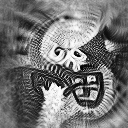

In [10]:
_ = render.render_vis(model, objectives.deepdream("mixed4a_pre_relu"), param_f=lambda:grayscale_image_to_rgb(128))
_ = render.render_vis(model, objectives.channel("mixed4a_pre_relu", 360), param_f=lambda:grayscale_image_to_rgb(128))
_ = render.render_vis(model, objectives.neuron("mixed4a_pre_relu", 476), param_f=lambda:grayscale_image_to_rgb(128))